In [2]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing import image

##working from iter 9-20

In [9]:
attr_data_path = "list_attr_celeba.csv"
images_data_path = "C:/Users/foreh/Documents/celeba/greyscale"
images_data_size = 10000 
model = tf.keras.models.load_model('bignoseyounghat/iter8')
width = 178
height = 218
original_image_size = (width,height)
df_org = pd.read_csv(attr_data_path)
for i in range(9, 21):
    if (i > 1):
        model = tf.keras.models.load_model('bignoseyounghat/iter'+str(i-1))
        print("model loaded: iter"+str(i-1))
        print("training model "+str(i))
    df = df_org[(1+images_data_size*i):images_data_size*(i+1)]
    df = df.replace(-1,0)
    #print(df.head(5))
    images_data = list()
    for idx in range(df.shape[0]):
        path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
        image = PIL.Image.open(path)
        image_array = np.asarray(image)
        images_data.append(image_array)
    images_data = np.array(images_data)
    def image_from_index(index, size=(original_image_size), path=images_data_path):
        path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
        # to read the image
        image = PIL.Image.open(path).resize(size)
        image_array = np.asarray(image)

        return image_array
    images = images_data # list of array of images
    labels = df[["image_id", "Big_Nose", "Young", "Wearing_Hat"]]  # dataframe of image features
    train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.3,random_state=45)
    y_test=test_labels.drop(["image_id"],axis=1)
    y_train=train_labels.drop(["image_id"],axis=1)

    X_test=test_images
    X_train=train_images
    #X_train = tf.expand_dims(X_train, axis=-1)
    print("Samples Training Set:",len(X_train))
    X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,test_size=0.5,random_state=42)
    print("Samples in Validation Data:",len(X_val))
    print("Samples in Test Data:",len(X_test))
    x_ = original_image_size[0]
    y_ = original_image_size[1]
    model.compile(optimizer = "sgd",loss="binary_crossentropy",metrics = [tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), 'categorical_accuracy'])
    training_process = model.fit(X_train,y_train,epochs = 5,validation_data = (X_val,y_val),batch_size=(4*(i%2)),shuffle = True)
    model.save('bignoseyounghat/iter'+str(i))

model loaded: iter8
training model 9
Samples Training Set: 6999
Samples in Validation Data: 1500
Samples in Test Data: 1500
Epoch 1/5
1750/1750 [==============================] - 30s 17ms/step - loss: 0.3073 - precision_5: 0.8261 - recall_5: 0.7933 - categorical_accuracy: 0.7121 - val_loss: 0.2739 - val_precision_5: 0.8363 - val_recall_5: 0.8363 - val_categorical_accuracy: 0.7300
Epoch 2/5
1750/1750 [==============================] - 29s 16ms/step - loss: 0.2996 - precision_5: 0.8314 - recall_5: 0.7975 - categorical_accuracy: 0.7165 - val_loss: 0.3044 - val_precision_5: 0.8585 - val_recall_5: 0.7885 - val_categorical_accuracy: 0.7353
Epoch 3/5
1750/1750 [==============================] - 29s 16ms/step - loss: 0.2940 - precision_5: 0.8326 - recall_5: 0.8025 - categorical_accuracy: 0.7180 - val_loss: 0.2861 - val_precision_5: 0.8068 - val_recall_5: 0.8618 - val_categorical_accuracy: 0.7513
Epoch 4/5
1750/1750 [==============================] - 29s 17ms/step - loss: 0.2945 - precision_5: 

KeyboardInterrupt: 

Empty box

In [40]:
model.evaluate(X_test,y_test)
#model.save_weights('./saved_models/model1.2')

47/47 [==============================] - 2s 33ms/step - loss: -3543840600409243648.0000 - precision_6: 0.0000e+00 - recall_5: 0.0000e+00 - categorical_accuracy: 0.5047


[-3.5438406004092436e+18, 0.0, 0.0, 0.5046666860580444]

In [13]:
model.predict(X_test)[2]
#print(y_test[1])

array([2.0817637e-01, 8.7538165e-01, 1.4023720e-04], dtype=float32)

Index(['Big_Nose', 'Young', 'Wearing_Hat'], dtype='object')
Big_Nose       0
Young          0
Wearing_Hat    0
Name: 721, dtype: int64


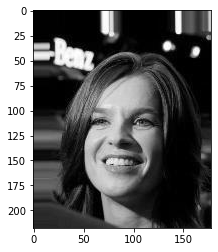

In [14]:
plt.imshow(X_test[2], cmap='gray')
print(labels.columns[1:])
print(y_test.iloc[2])

In [10]:
df = df_org[:images_data_size]
df = df.replace(-1,0)
#print(df.head(5))
images_data = list()
for idx in range(df.shape[0]):
    path = "{}/{}".format(str(images_data_path),str(df.iloc[idx].image_id))
    image = PIL.Image.open(path)
    image_array = np.asarray(image)
    images_data.append(image_array)
images_data = np.array(images_data)
def image_from_index(index, size=(original_image_size), path=images_data_path):
    path = "{}/{}".format(str(path),str(df.iloc[index].image_id))
    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)

    return image_array
images = images_data # list of array of images
labels = df[["image_id", "Big_Nose", "Young", "Wearing_Hat"]]  # dataframe of image features
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.3,random_state=45)
y_test=test_labels.drop(["image_id"],axis=1)
y_train=train_labels.drop(["image_id"],axis=1)

X_test=test_images
X_train=train_images
#X_train = tf.expand_dims(X_train, axis=-1)
print("Samples Training Set:",len(X_train))
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test,test_size=0.5,random_state=42)
for i in range(1, 12):
    model1 = tf.keras.models.load_model('bignoseyounghat/iter'+str(i))
    model1.evaluate(X_val,y_val)

Samples Training Set: 7000
47/47 [==============================] - 2s 28ms/step - loss: 0.2926 - precision_7: 0.8369 - recall_7: 0.7995 - categorical_accuracy: 0.7000
